In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('Fish.csv')

In [ ]:
data.shape

(159, 7)

In [ ]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
print(data['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
data['Species']=data['Species'].map({'Bream':1,'Roach':2,'Whitefish':3, 'Parkki':4,'Perch':5, 'Pike':6, 'Smelt':7})

In [ ]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,7,12.2,11.5,12.2,13.4,2.0904,1.3936
155,7,13.4,11.7,12.4,13.5,2.4300,1.2690
156,7,12.2,12.1,13.0,13.8,2.2770,1.2558
157,7,19.7,13.2,14.3,15.2,2.8728,2.0672


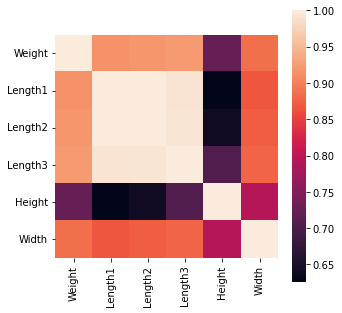

In [ ]:
# Plotting the correlation matrix of the dataset

from matplotlib import pyplot as plt
import seaborn as sns
method = "pearson"
# correlation matrix
corr_mat = data.corr(method=method)

plt.figure(figsize=(5,5)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [ ]:
y=data['Species']
x=data.drop(['Species'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x,y, test_size=0.30,stratify=y)

In [ ]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [ ]:
#Predicting Y="label"  through dataset "Data"
from sklearn.metrics import accuracy_score
y_pred = lr.predict(x_validate)
acu_LR=accuracy_score(y_validate,y_pred)
acu_LR

0.9583333333333334

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_validate,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.83      0.83      0.83         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00         5
           7       0.80      1.00      0.89         4

    accuracy                           0.96        48
   macro avg       0.95      0.90      0.91        48
weighted avg       0.96      0.96      0.96        48



In [ ]:
import pickle
filename = 'Fish_LR.sav'
pickle.dump(lr, open(filename, 'wb'))